In [1]:
import pandas as pd
import os

# Ruta a la carpeta donde están los archivos CSV
ruta_csv = "Data/csv"  # Cambia esta ruta a tu carpeta de CSVs

# Lista para almacenar los DataFrames
dfs = []

# Iterar sobre todos los archivos CSV en la carpeta
for archivo in os.listdir(ruta_csv):
    if archivo.endswith(".csv"):
        archivo_path = os.path.join(ruta_csv, archivo)
        print(f"Levantando archivo: {archivo_path}")
        
        # Leer el archivo CSV y agregarlo a la lista
        df = pd.read_csv(archivo_path)
        dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_completo = pd.concat(dfs, ignore_index=True)

# Mostrar la información del DataFrame
print("Información del DataFrame:")
print(df_completo.info())

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df_completo.head())


Levantando archivo: Data/csv\proyecto_2012-04-17.csv
Levantando archivo: Data/csv\proyecto_2012-05-02.csv
Levantando archivo: Data/csv\proyecto_2012-07-17.csv
Levantando archivo: Data/csv\proyecto_2012-08-23.csv
Levantando archivo: Data/csv\proyecto_2012-09-11.csv
Levantando archivo: Data/csv\proyecto_2012-09-21.csv
Levantando archivo: Data/csv\proyecto_2013-01-22.csv
Levantando archivo: Data/csv\proyecto_2013-02-04.csv
Levantando archivo: Data/csv\proyecto_2013-03-26.csv
Levantando archivo: Data/csv\proyecto_2013-05-21.csv
Levantando archivo: Data/csv\proyecto_2013-09-09.csv
Levantando archivo: Data/csv\proyecto_2013-09-12.csv
Levantando archivo: Data/csv\proyecto_2013-09-19.csv
Levantando archivo: Data/csv\proyecto_2013-11-18.csv
Levantando archivo: Data/csv\proyecto_2014-02-18.csv
Levantando archivo: Data/csv\proyecto_2014-06-03.csv
Levantando archivo: Data/csv\proyecto_2014-06-11.csv
Levantando archivo: Data/csv\proyecto_2014-08-13.csv
Levantando archivo: Data/csv\proyecto_2014-11-

In [2]:
# Guardar el DataFrame en un nuevo archivo CSV
df_completo.to_csv("Data/csv_completo.csv", index=False)

In [15]:
df_completo = pd.read_csv("Data/csv_completo.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8072\2868210097.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv("Data/csv_completo.csv")


In [3]:
df_completo.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'sale_date'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np

# Asegurarnos de que el DataFrame está cargado y tiene la columna 'sale_date'
df_completo = df_completo.copy()

# Definir los meses del rango diciembre 2023 - noviembre 2024
inicio = pd.to_datetime("2023-12-01")
fin = pd.to_datetime("2024-11-30")

# Generar una lista de meses dentro del rango
meses = pd.date_range(start=inicio, end=fin, freq="MS")  # MS: Start of the month

# Calcular el número de registros por mes (aproximadamente)
num_registros = len(df_completo)
num_registros_por_mes = num_registros // len(meses)  # División entera

# Inicializar una lista para almacenar las fechas generadas
nuevas_fechas = []

# Distribuir los registros de manera secuencial
inicio_indice = 0
for mes in meses:
    # Calcular el rango de índices para el mes actual
    fin_indice = inicio_indice + num_registros_por_mes
    
    # Generar fechas secuenciales para el mes actual
    fechas_mes = pd.date_range(start=mes, end=mes + pd.offsets.MonthEnd(0), freq="D")
    
    # Repetir las fechas si hay más registros que días en el mes
    fechas_asignadas = np.tile(fechas_mes, num_registros_por_mes // len(fechas_mes) + 1)[:num_registros_por_mes]
    nuevas_fechas.extend(fechas_asignadas)
    
    # Actualizar el índice de inicio para el siguiente mes
    inicio_indice = fin_indice

# Si quedan registros sin asignar debido a la división entera, distribuirlos en el último mes
if len(nuevas_fechas) < num_registros:
    faltantes = num_registros - len(nuevas_fechas)
    nuevas_fechas.extend(nuevas_fechas[-faltantes:])

# Asignar las nuevas fechas al DataFrame
df_completo['sale_date'] = nuevas_fechas[:num_registros]

# Extraer el mes de la columna 'sale_date'
df_completo['Month'] = df_completo['sale_date'].dt.month

# Verificar las primeras filas del DataFrame
print(df_completo[['sale_date', 'Month', 'Sale (Dollars)']].head())

# Guardar el dataset actualizado en un archivo CSV (opcional)
output_file = "dataset_con_fechas_actualizado.csv"
df_completo.to_csv(output_file, index=False)
print(f"Dataset actualizado guardado en: {output_file}")



   sale_date  Month Sale (Dollars)
0 2023-12-01     12         $28.08
1 2023-12-02     12         $66.24
2 2023-12-03     12         $22.20
3 2023-12-04     12         $67.14
4 2023-12-05     12        $175.92
Dataset actualizado guardado en: dataset_con_fechas_actualizado.csv


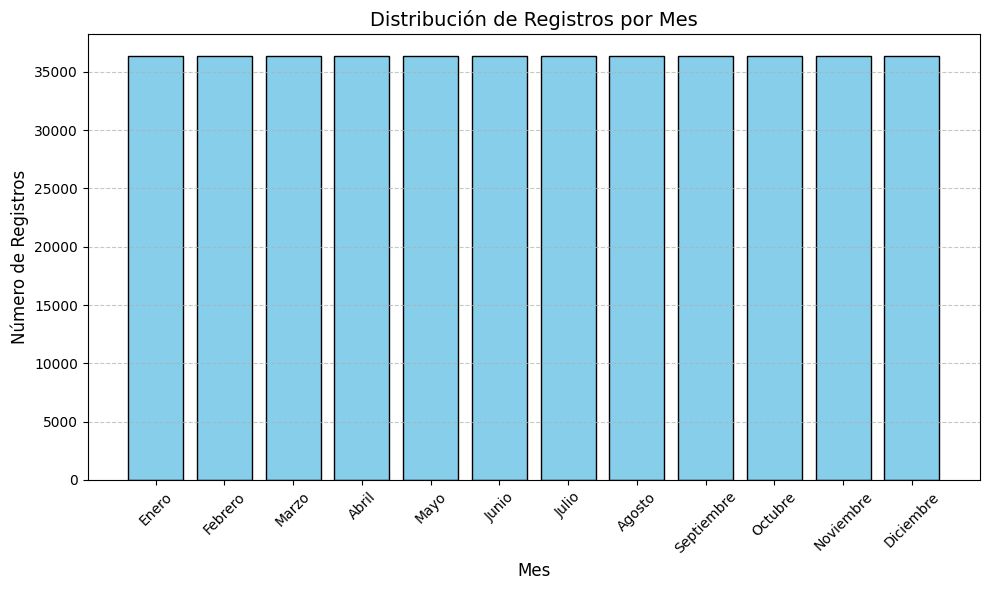

In [5]:
import matplotlib.pyplot as plt

# Contar los registros por mes
distribucion_meses = df_completo['sale_date'].dt.month.value_counts().sort_index()

# Crear etiquetas de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(distribucion_meses.index, distribucion_meses.values, color='skyblue', edgecolor='black')

# Ajustar el gráfico
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.title('Distribución de Registros por Mes', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
